In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [6]:
df = pd.read_json ('/Users/enriquegoudet/Desktop/Proyectos/comps/server/ratings.json')

In [7]:
df

,model,pk,fields
0,bot.ratings,1,"{'user': 1, 'place': 1, 'rating': 5}"
1,bot.ratings,2,"{'user': 1, 'place': 2, 'rating': 5}"
2,bot.ratings,3,"{'user': 1, 'place': 3, 'rating': 5}"
3,bot.ratings,4,"{'user': 1, 'place': 8, 'rating': 5}"
4,bot.ratings,5,"{'user': 1, 'place': 11, 'rating': 5}"
...,...,...,...
121,bot.ratings,122,"{'user': 10, 'place': 30, 'rating': 1}"
122,bot.ratings,123,"{'user': 10, 'place': 36, 'rating': 5}"
123,bot.ratings,124,"{'user': 10, 'place': 40, 'rating': 5}"
124,bot.ratings,125,"{'user': 10, 'place': 42, 'rating': 5}"


In [8]:
# Cleaning data
#Grabbing fields column of json object
pd_series = df['fields']
pd_series


0        {'user': 1, 'place': 1, 'rating': 5}
1        {'user': 1, 'place': 2, 'rating': 5}
2        {'user': 1, 'place': 3, 'rating': 5}
3        {'user': 1, 'place': 8, 'rating': 5}
4       {'user': 1, 'place': 11, 'rating': 5}
                        ...                  
121    {'user': 10, 'place': 30, 'rating': 1}
122    {'user': 10, 'place': 36, 'rating': 5}
123    {'user': 10, 'place': 40, 'rating': 5}
124    {'user': 10, 'place': 42, 'rating': 5}
125    {'user': 10, 'place': 50, 'rating': 5}
Name: fields, Length: 126, dtype: object

In [9]:
# from pandas series -> json -> python dict -> dataframe
ratings_json = pd.Series.to_json(pd_series)
rating_dict = json.loads(ratings_json)
rating_objects = rating_dict.values()
ratings_df = pd.DataFrame.from_dict(rating_objects)
ratings_df.head()

,user,place,rating
0,1,1,5
1,1,2,5
2,1,3,5
3,1,8,5
4,1,11,5


In [10]:
# Train vs Test Data
split_value = int(len(ratings_df) * 0.80)
train_data = ratings_df[:split_value]
test_data = ratings_df[split_value:]

<ipython-input-11-1175fa382197>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


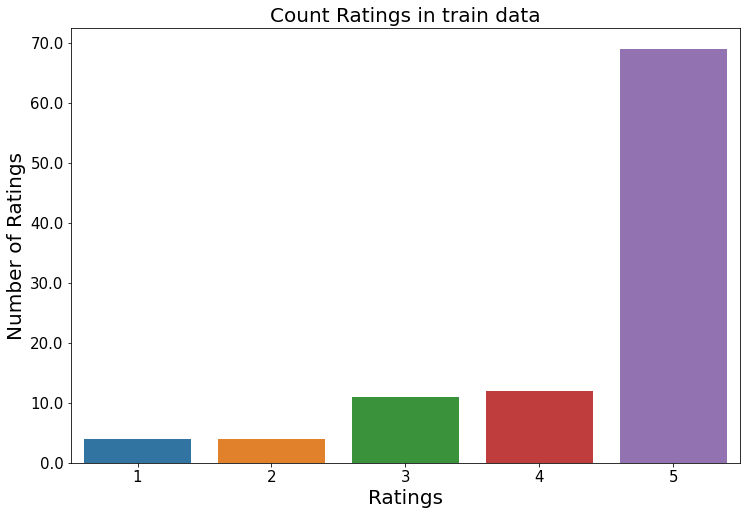

In [11]:
# Count number of ratings in training data set
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=train_data)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [12]:
# Number of rated places by user
rated_place_per_user = train_data.groupby(by = "user")
rated_place_per_user["rating"].count().sort_values(ascending = False)



user
3    20
1    17
7    15
2    15
5    14
4     8
8     6
6     5
Name: rating, dtype: int64

In [13]:
# Number of ratigs per place
rated_place_per_user = train_data.groupby(by = "place")
rated_place_per_user["rating"].count().sort_values(ascending = False)

place
11    6
39    4
1     4
30    3
6     3
42    3
8     3
27    3
2     3
38    3
28    3
36    3
5     3
13    3
32    3
4     2
22    2
20    2
12    2
15    2
14    2
24    2
10    2
7     2
23    2
50    2
49    2
48    2
29    2
45    2
31    2
40    1
3     1
47    1
46    1
43    1
41    1
9     1
35    1
37    1
26    1
34    1
33    1
16    1
17    1
18    1
19    1
21    1
25    1
Name: rating, dtype: int64

In [14]:
"""
Beginning of this tutorial:
#https://medium.com/sfu-cspmp/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0
"""
# Normalizing Data
ratings_df
Mean = ratings_df.groupby(by="user",as_index=False)['rating'].mean()
Rating_avg = pd.merge(ratings_df,Mean,on='user')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']

In [15]:
Rating_avg.head()

,user,place,rating_x,rating_y,adg_rating
0,1,1,5,5.0,0.0
1,1,2,5,5.0,0.0
2,1,3,5,5.0,0.0
3,1,8,5,5.0,0.0
4,1,11,5,5.0,0.0


In [16]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='user',columns='place')
check.head()

place,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,45,46,47,48,49,50
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN
3,5.0,5.0,NaN,3.0,2.0,5.0,4.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
5,3.0,5.0,NaN,3.0,2.0,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Create user-item ratings matrix
final = pd.pivot_table(Rating_avg,values='adg_rating',index='user',columns='place')

#Replacing NaN values with Place Average
final_place = final.fillna(final.mean(axis=0))

#Replacing NaN values by User average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [18]:
final_place.head()

place,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,45,46,47,48,49,50
user,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000,-1.121429,-1.525397,0.759762,0.378571,0.000000,-0.1,-0.070833,...,0.0000,0.000000,0.000000,0.0,0.000000,0.933333,0.300000,-0.166667,0.0000,0.000000
2,-0.033532,0.751786,0.625,-1.121429,-1.525397,0.759762,0.378571,0.189583,-0.1,-0.070833,...,0.5625,0.333333,0.933333,0.0,0.327778,0.933333,0.933333,0.933333,0.0625,-0.713889
3,0.900000,0.900000,0.625,-1.100000,-2.100000,0.900000,-0.100000,0.900000,-0.1,-0.070833,...,0.5625,0.333333,0.686111,0.0,0.327778,0.933333,0.300000,-0.166667,0.0625,-0.713889
4,-0.033532,0.751786,0.625,-1.121429,-1.525397,0.759762,0.378571,0.189583,-0.1,0.125000,...,0.5625,0.333333,0.686111,0.0,0.327778,0.933333,0.300000,-0.166667,0.1250,-0.713889
5,-1.142857,0.857143,0.625,-1.142857,-2.142857,-0.142857,0.857143,0.189583,-0.1,-0.070833,...,0.5625,0.333333,0.686111,0.0,0.327778,0.933333,0.300000,-0.166667,0.0625,-0.713889


In [19]:
final_user.head()

place,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,45,46,47,48,49,50
user,,,,,,,,,,,,,,,,,,,,,
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,2.368476e-16,...,2.368476e-16,2.368476e-16,9.333333e-01,2.368476e-16,2.368476e-16,9.333333e-01,9.333333e-01,9.333333e-01,2.368476e-16,2.368476e-16
3,9.000000e-01,9.000000e-01,3.552714e-16,-1.100000e+00,-2.100000e+00,9.000000e-01,-1.000000e-01,9.000000e-01,-1.000000e-01,3.552714e-16,...,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16,3.552714e-16
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.250000e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.250000e-01,0.000000e+00
5,-1.142857e+00,8.571429e-01,-3.806479e-16,-1.142857e+00,-2.142857e+00,-1.428571e-01,8.571429e-01,-3.806479e-16,-3.806479e-16,-3.806479e-16,...,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16,-3.806479e-16


In [20]:
# Calculating user similarity by replacing NaN values with user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user

user,1,2,3,4,5,6,7,8,9,10
user,,,,,,,,,,
1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
2,0.0,0.000000e+00,1.856662e-31,3.057909e-33,1.372181e-01,8.716019e-02,-0.051550,0.407967,2.789784e-33,0.050468
3,0.0,1.856662e-31,0.000000e+00,3.548712e-33,6.754500e-01,6.168689e-31,0.197494,0.176293,5.101454e-01,-0.019645
4,0.0,3.057909e-33,3.548712e-33,0.000000e+00,-3.456344e-33,-5.976143e-02,0.046507,0.034503,-1.470690e-01,-0.088430
5,0.0,1.372181e-01,6.754500e-01,-3.456344e-33,0.000000e+00,7.871603e-02,0.053907,0.079532,3.318984e-01,0.139267
6,0.0,8.716019e-02,6.168689e-31,-5.976143e-02,7.871603e-02,0.000000e+00,-0.115176,0.115470,1.673436e-01,0.591888
7,0.0,-5.155039e-02,1.974942e-01,4.650730e-02,5.390711e-02,-1.151760e-01,0.000000,-0.014378,-2.696516e-02,-0.308813
8,0.0,4.079673e-01,1.762928e-01,3.450328e-02,7.953176e-02,1.154701e-01,-0.014378,0.000000,-1.136657e-02,-0.044573
9,0.0,2.789784e-33,5.101454e-01,-1.470690e-01,3.318984e-01,1.673436e-01,-0.026965,-0.011367,0.000000e+00,0.222923


In [21]:
# Calculating user similarity on replacing NAN by place avg
cosine = cosine_similarity(final_place)
np.fill_diagonal(cosine, 0 )
similarity_with_place = pd.DataFrame(cosine,index=final_place.index)
similarity_with_place.columns=final_user.index
similarity_with_place.head()

user,1,2,3,4,5,6,7,8,9,10
user,,,,,,,,,,
1,0.000000,0.857024,0.781390,0.839311,0.796533,0.865977,0.701952,0.782751,0.768881,0.796358
2,0.857024,0.000000,0.922722,0.950053,0.936348,0.957336,0.811154,0.887506,0.875068,0.858316
3,0.781390,0.922722,0.000000,0.928696,0.909819,0.939295,0.802149,0.880841,0.890194,0.789645
4,0.839311,0.950053,0.928696,0.000000,0.941943,0.954460,0.894706,0.919202,0.831707,0.811930
5,0.796533,0.936348,0.909819,0.941943,0.000000,0.949596,0.828346,0.874807,0.840678,0.882058


In [22]:
# Find n Nearest Neighbors
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [23]:
# top 5 neighbors for each user
sim_user_5_u = find_n_neighbours(similarity_with_user, 8)
sim_user_5_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8
user,,,,,,,,
1,10,9,8,7,6,5,4,3
2,8,5,6,10,3,4,9,2
3,5,9,7,8,6,2,4,3
4,7,8,3,2,4,1,5,6
5,3,9,10,2,8,6,7,5


In [24]:
# top 5 neighbors for each user
sim_user_5_m = find_n_neighbours(similarity_with_place, 5)
sim_user_5_m.head()

,top1,top2,top3,top4,top5
user,,,,,
1,6,2,4,5,10
2,6,4,5,3,8
3,6,4,2,5,9
4,6,2,5,3,8
5,6,4,2,3,10


In [25]:
def get_user_similar_places( user1, user2 ):
    common_places = Rating_avg[Rating_avg.user == user1].merge(
    Rating_avg[Rating_avg.user == user2],
    on = "place",
    how = "inner" )
    return common_places

In [26]:
a = get_user_similar_places(1,6)
a = a.loc[ : , ['rating_x_x','rating_x_y',]]
a.head()

,rating_x_x,rating_x_y
0,5,5
1,5,5


In [27]:
#Similarity score between user and place
def User_item_score(user,item):
    a = sim_user_5_m[sim_user_5_m.index==user].values
    b = a.squeeze().tolist()
    c = final_place.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['user'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_place.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [28]:
score = User_item_score(1,32)
print("score (u,i) is",score)

score (u,i) is 5.3559170927821125


In [29]:
Rating_avg = Rating_avg.astype({"place": str})
Place_user = Rating_avg.groupby(by = 'user')['place'].apply(lambda x:','.join(x))

In [30]:
def User_item_score1(user):
    Place_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_5_m[sim_user_5_m.index==user].values
    b = a.squeeze().tolist()
    d = Place_user[Place_user.index.isin(b)]
    l = ','.join(d.values)
    Place_seen_by_similar_users = l.split(',')
    Places_under_consideration = list(set(Place_seen_by_similar_users)-set(list(map(str, Place_seen_by_user))))
    Places_under_consideration = list(map(int, Places_under_consideration))
    score = []
    for item in Places_under_consideration:
        c = final_place.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['user'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_place.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'place':Places_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
#     Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movieId')
#     Movie_Names = Movie_Name.title.values.tolist()
    top5 = top_5_recommendation.place.values.tolist()
    return top5

In [31]:
predicted_places = User_item_score1(3)
predicted_places

[46, 24, 23, 3, 42]

In [47]:
# Writing to pickle file to use in Django Views
pickle.dump(m, open("/Users/enriquegoudet/Desktop/Proyectos/comps/server/recommender/recommender.pkl", "wb"))

In [48]:
pickle_off = open("recommender.pkl","rb")
model = pickle.load(pickle_off)

In [50]:
model.User_item_score1(10)

[46, 24, 13, 23, 2]